In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.gaussian_process import GaussianProcessRegressor
import pandas as pd

In [4]:
X = np.load('initial_data/function_3/initial_inputs.npy')
Y = np.load('initial_data/function_3/initial_outputs.npy')

In [4]:
my_dict = {
    'X1': X[:,0],
    'X2': X[:,1],
    'X3': X[:,2],
    'Y' : Y
}

df = pd.DataFrame(my_dict)
df

,X1,X2,X3,Y
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


In [5]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# to optimize the acquisition function, we will use gridsearch over a space of 1,000,000 gridpoints
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
x3 = np.linspace(0, 1, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            X_grid.append([x1[i], x2[j], x3[k]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(next_query)

[1.         0.         0.70707071]


<IPython.core.display.Javascript object>


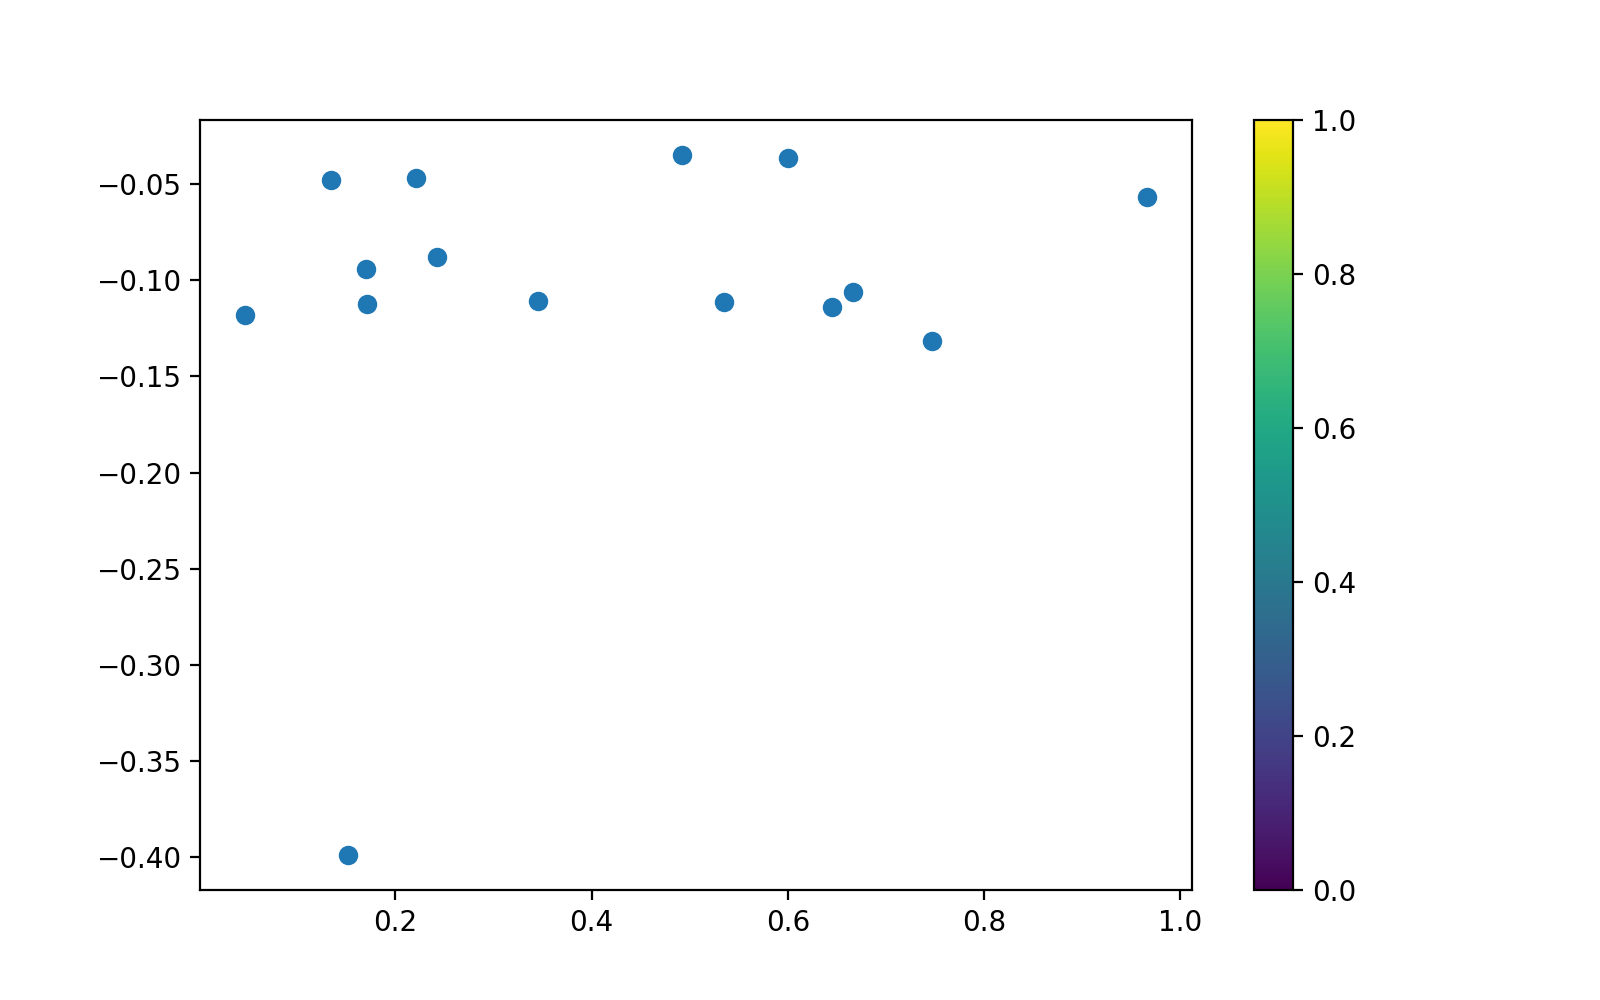

In [6]:
#Let's see how each input varies with each output

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], Y)
plt.colorbar()

<IPython.core.display.Javascript object>


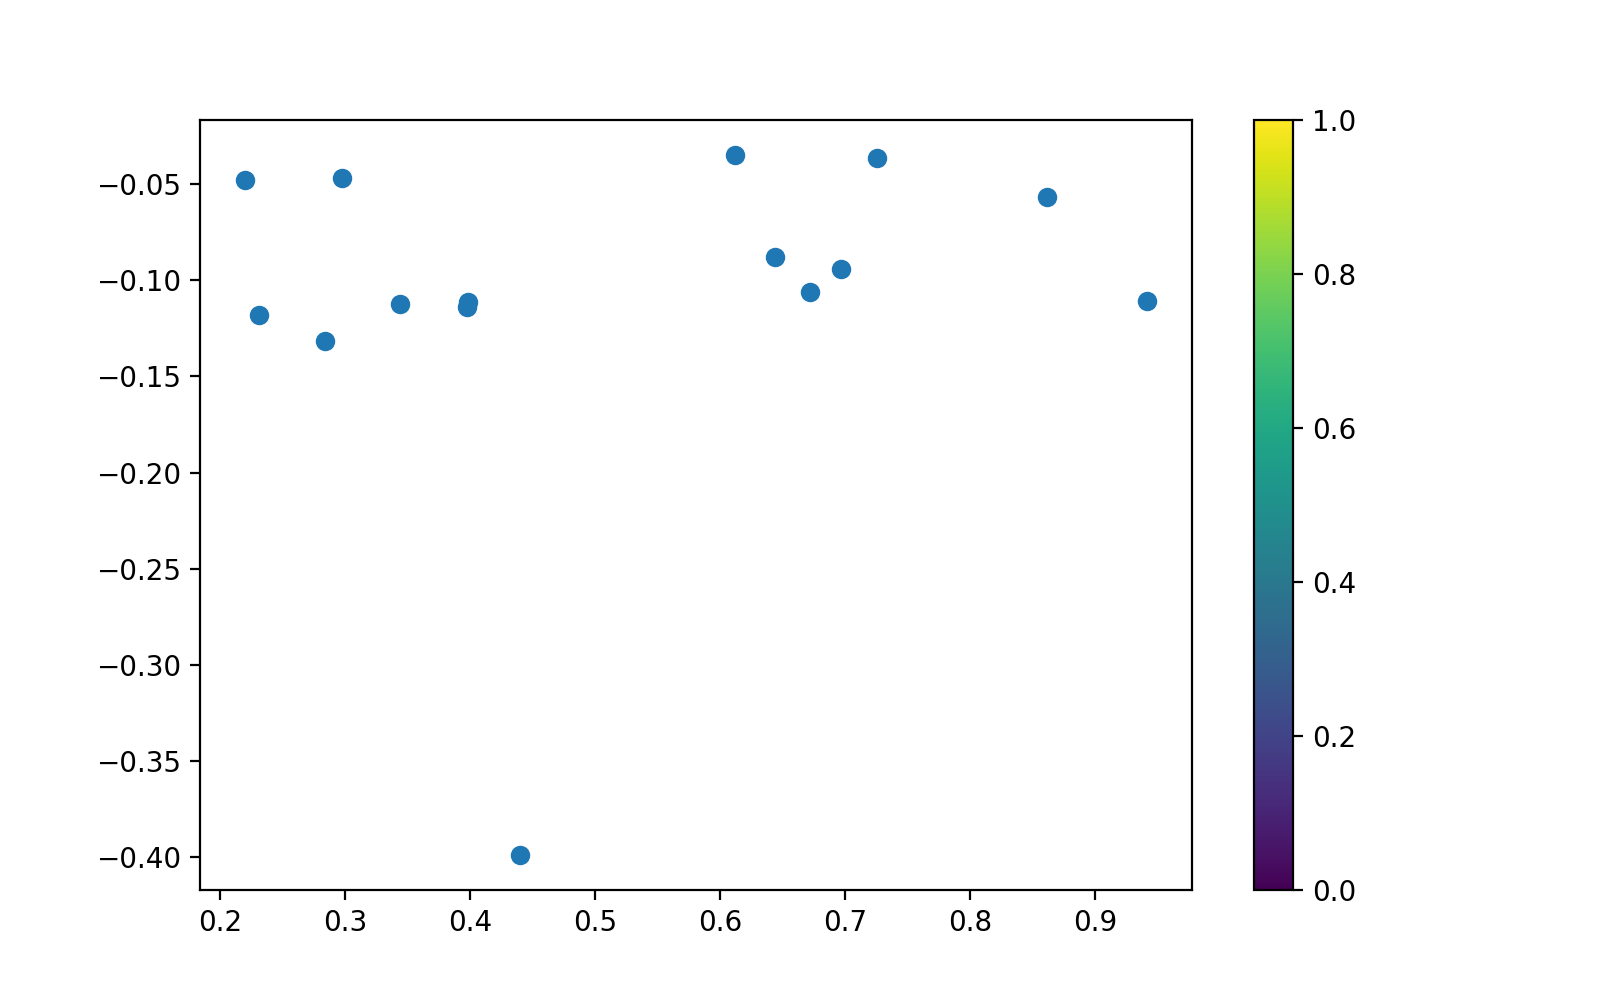

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 1], Y)
plt.colorbar()

<IPython.core.display.Javascript object>


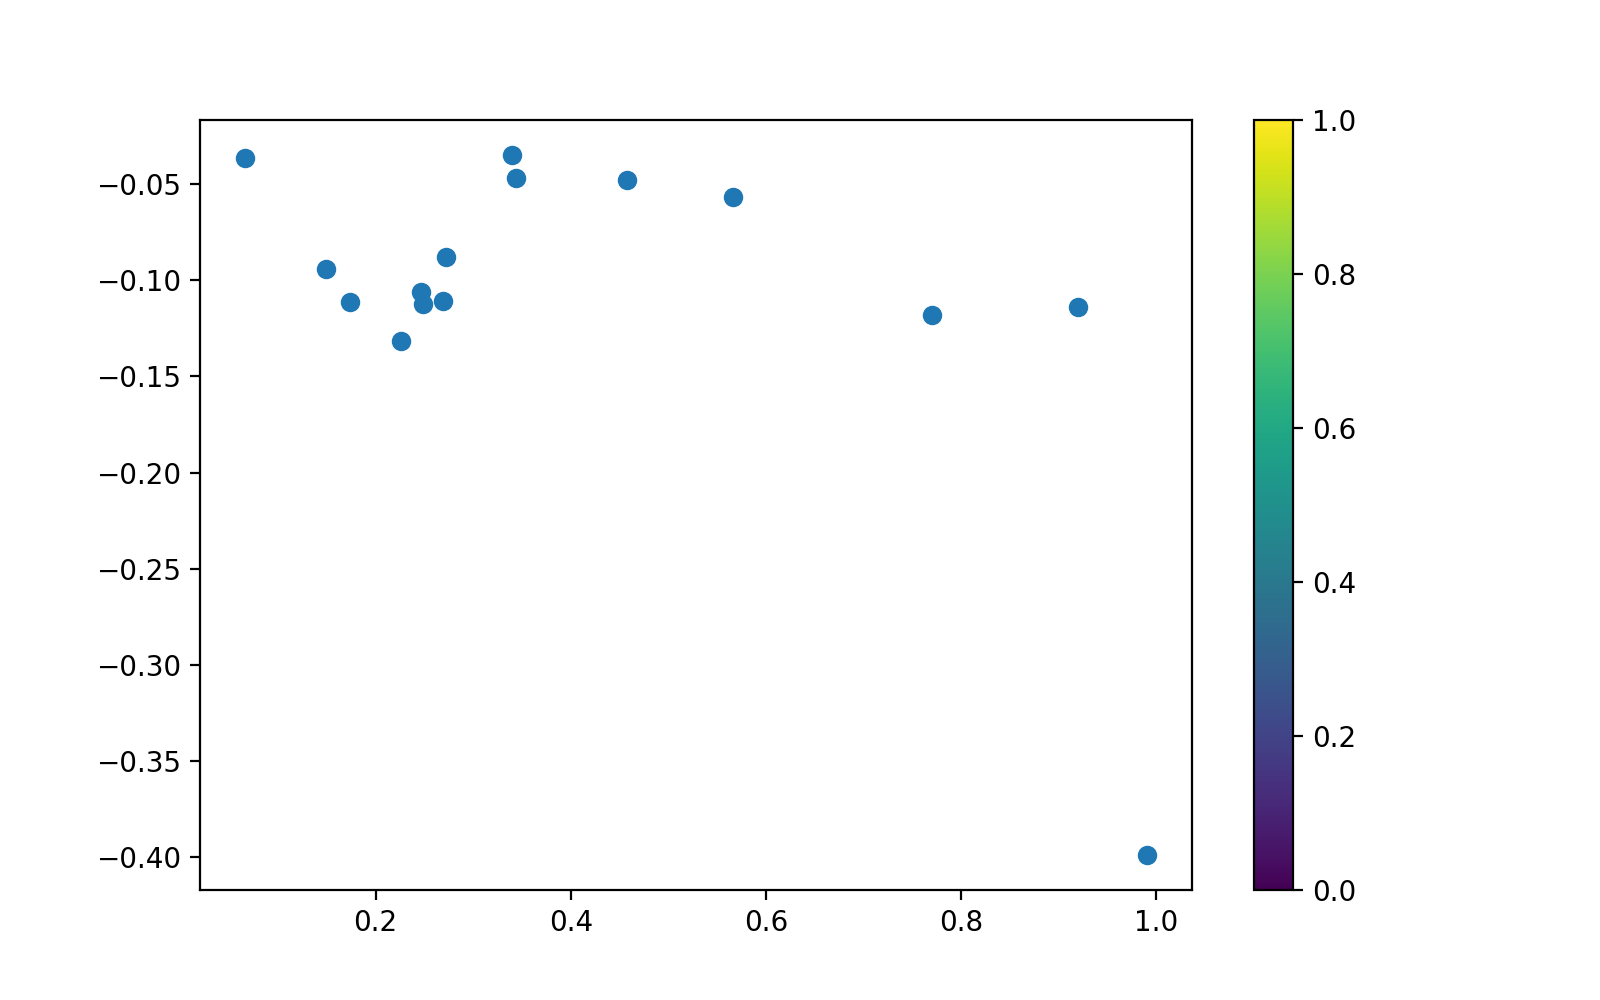

In [8]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 2], Y)
plt.colorbar()

<IPython.core.display.Javascript object>


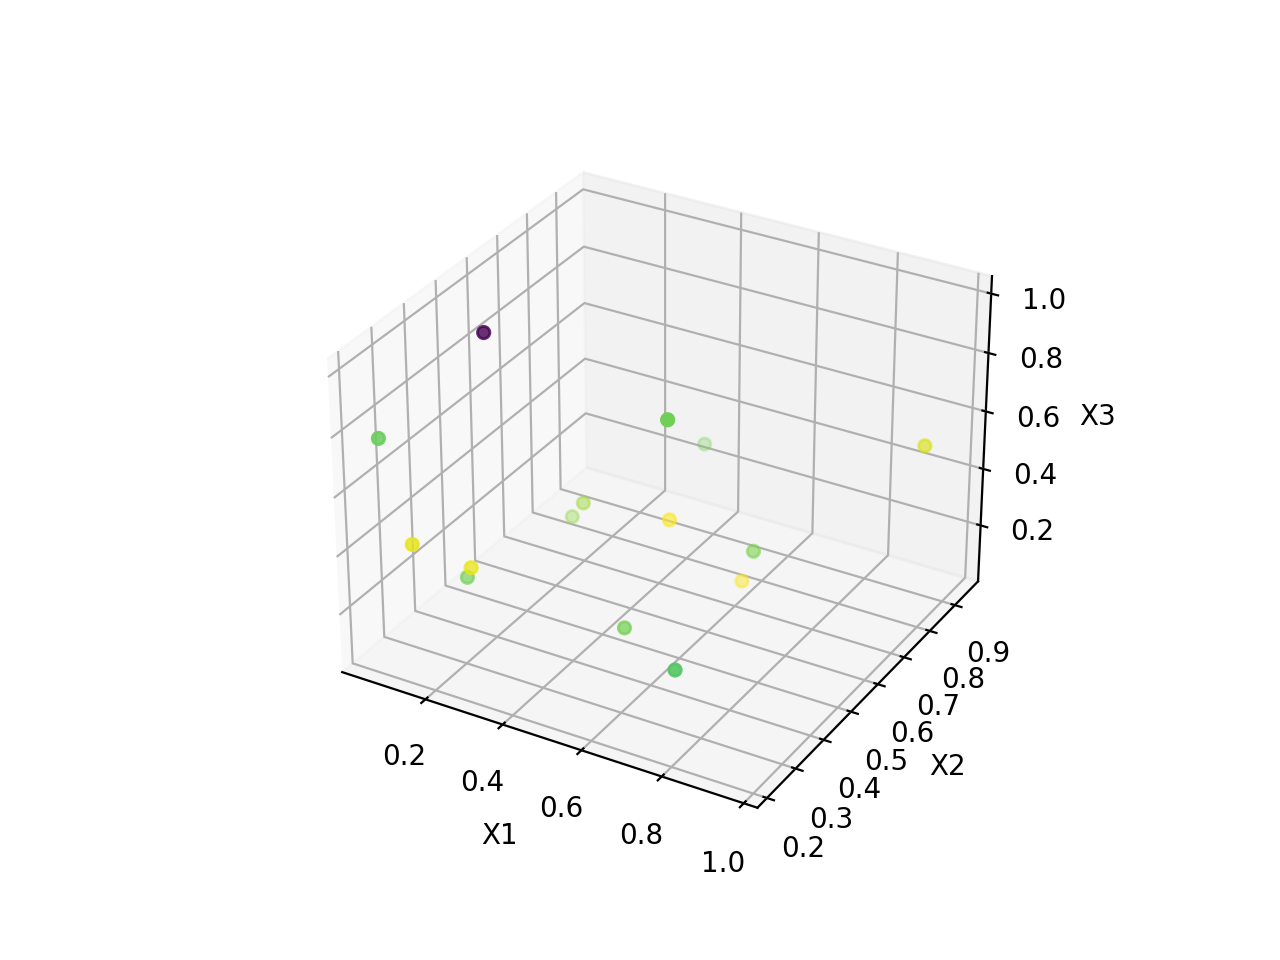

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [11]:
print(X[:,2])

[0.2487372  0.27243281 0.17338873 0.34017639 0.45820622 0.26936348
 0.99088187 0.91977134 0.22629985 0.14916943 0.34355534 0.2462953
 0.77061759 0.06608864 0.56682913]


In [14]:
#Max appears at X = [0.13462167, 0.43999062, 0.99088187], therefore restrict viewing to this area
next_query_x1 = np.random.normal(0.13462167, scale = 0.01)
next_query_x2 = np.random.normal(0.43999062, scale = 0.01)
next_query_x3 = np.random.normal(0.99088187, scale = 0.01)
print('Next query Random: ', [round(next_query_x1,6), round(next_query_x2,6), round(next_query_x3,6)])

# Using a restricted UCB
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# to optimize the acquisition function, we will simply use gridsearch over a space of 1.000.000 gridpoints
x1 = np.linspace(0.1, 0.15, 100)
x2 = np.linspace(0.4, 0.45, 100)
x3 = np.linspace(0.95, 1.0, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            X_grid.append([x1[i], x2[j], x3[k]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print('Next query UCB: ' + str(round(next_query[0],6)) + '-' + str(round(next_query[1],6)) + '-' + str(round(next_query[2],6)))

Next query Random:  [0.139455, 0.441132, 0.986961]
Next query UCB: 0.15-0.4-0.95
